<a href="https://colab.research.google.com/github/mohammad-jamalaldeen/Plotting/blob/main/Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib

Matplotlib is a plotting library. (used to plot graphs, display images,...etc)

## pyplot

In this section we will give a brief introduction to the matplotlib.pyplot module, which provides a plotting system similar to that of MATLAB.

In [ ]:
import matplotlib.pyplot as plt

The following command performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with matplotlib.
After executing it we will be displaying plots inline:

In [ ]:
%matplotlib inline

### Plotting

The most important function in matplotlib is plot, which allows you to plot 2D data. Here is a simple example:

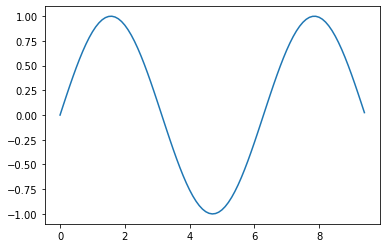

In [ ]:
# plotting  y = sin(x)
import numpy as np #needed for sin function
x = np.arange(0,3*np.pi,0.1)
y_sin = np.sin(x)
plt.plot(x,y_sin)

With just a little bit of extra work we can easily plot multiple lines at once,modify their colors and add a title, legend, and axis labels:

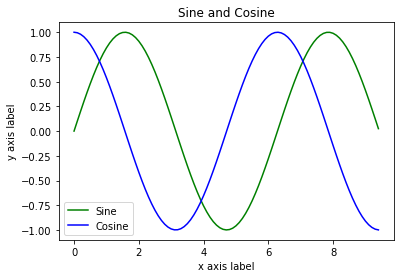

In [ ]:
y_cos = np.cos(x)

plt.plot(x,y_sin,'g') # g for green
plt.plot(x,y_cos,'b') # b for blue
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

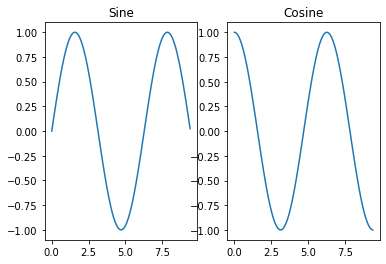

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# 3 parameters are passed to subplot function, height,width and which subplot you want to activate
# as an example if you want 2 horizontal grids to plot,then height = 1 , width = 2
plt.subplot(1,2,1) # height = 1,width = 2, activate subplot number 1
plt.plot(x,y_sin)
plt.title('Sine')

plt.subplot(1,2,2) # height = 1,width = 2, activate subplot number 2
plt.plot(x,y_cos)
plt.title('Cosine')

plt.show()

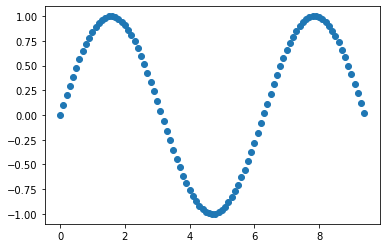

In [ ]:
plt.scatter(x, y_sin)

<BarContainer object of 95 artists>

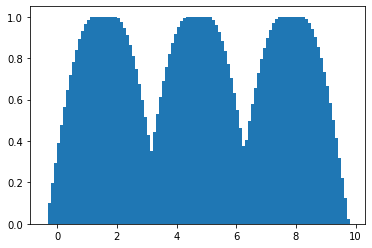

In [ ]:
plt.bar(x, np.abs(y_sin))

# Creating statistical plots easily with seaborn and pandas

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# path = "https://"
# path = "C:\\users\\s.csv"
# path = "./a.csv"

# df = pd.read_csv(path)

In [ ]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Columns types:



1.   nominal
2.   ordinal
3.   numbers
4.   absolute



In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


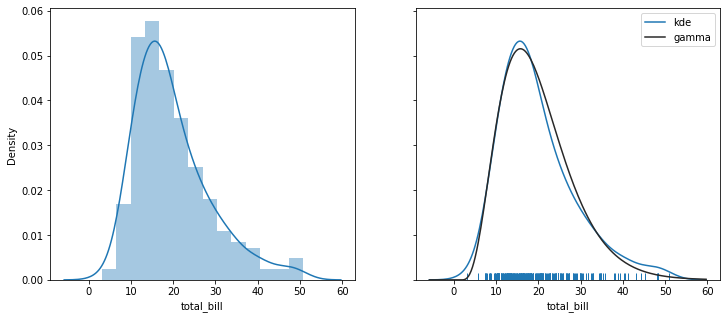

In [ ]:
# We create two subplots sharing the same y axis.
f, (ax1, ax2) = plt.subplots(1, 2,
                       figsize=(12, 5),
                       sharey=True)

# Left subplot.
# Histogram and KDE (active by default).
sns.distplot(tips.total_bill,
             ax=ax1,
             hist=True)

# Right subplot.
# "Rugplot", KDE, and gamma fit.
sns.distplot(tips.total_bill,
             ax=ax2,
             hist=False,
             kde=True,
             rug=True,
             fit=stats.gamma,
             fit_kws=dict(label='gamma'),
             kde_kws=dict(label='kde'))
ax2.legend()

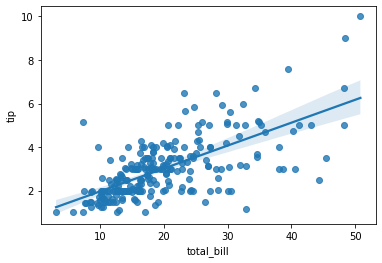

In [ ]:
sns.regplot(x="total_bill", y="tip", data=tips)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


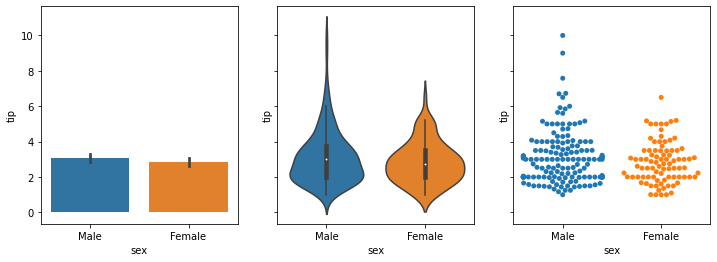

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(12, 4), sharey=True)
sns.barplot(x='sex', y='tip', data=tips, ax=ax1)
sns.violinplot(x='sex', y='tip', data=tips, ax=ax2)
sns.swarmplot(x='sex', y='tip', data=tips, ax=ax3)

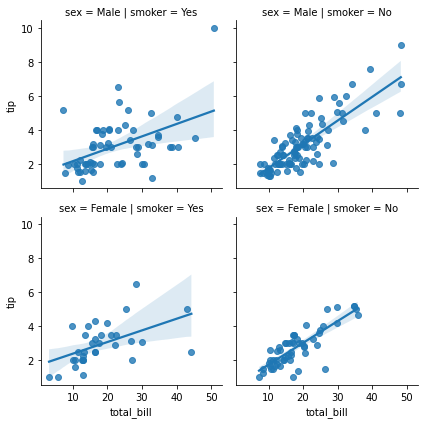

In [ ]:
g = sns.FacetGrid(tips, col='smoker', row='sex')
g.map(sns.regplot, 'total_bill', 'tip')

In [ ]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


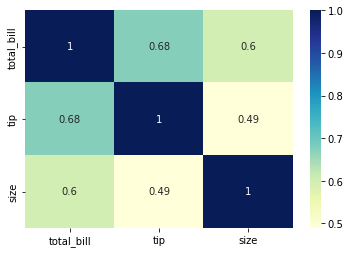

In [ ]:
dataplot = sns.heatmap(tips.corr(), cmap="YlGnBu", annot=True)

# Assigment:

you have to run the next cell to determine which dataset to be visualised


In [ ]:
datasets = sns.get_dataset_names()[:10]
l = len(datasets)
print(datasets)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights']


In [ ]:
import random

index = int(input("write your index: "))
random.seed(index)
r = random.randint(1,l)-1

dataset = datasets[r]

print("The assigned dataset is", dataset)

write your index: 154012
The assigned dataset is anagrams


In [ ]:
d = sns.load_dataset(dataset)

# do similar analysis to that done above